# Análisis de archivo de simulación AWS DeepRacer Amazon

### Esta notebook supone que ya se corrió un entrenamiento con el DeepRacer y se quieren analizar los logs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# PPO (Proximal-Policy Optimization)
# https://www.youtube.com/watch?v=5P7I-xPq8u8&t=3s

In [3]:
# Hay que instalar boto3
# pip install boto3

import json
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from scipy import misc
pd.set_option('display.max_colwidth', 300)
from IPython.display import Markdown as md
from rewards_funcs import reward_function_follow_center_line

## Waypoints
https://github.com/aws-samples/aws-deepracer-workshops/tree/master/log-analysis/tracks
## Detalles entrenamiento
https://docs.aws.amazon.com/deepracer/latest/developerguide/deepracer-console-train-evaluate-models.html
https://docs.aws.amazon.com/deepracer/latest/developerguide/deepracer-reward-function-input.html
## Imagen waypoints
https://raw.githubusercontent.com/aws-samples/aws-deepracer-workshops/master/Workshops/2019-AWSSummits-AWSDeepRacerService/Lab1/img/reinventtrack_waypoints.png

# Instalación de librería de AWS

Correr en su entorno el siguiente comando
### pip install boto3

# Configuración de archivo de config para poder acceder a logs en AWS
https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html

hay que configurar un archivo llamado credentials con las credenciales en la siguiente carpeta:

**Linx y Mac**

ls  ~/.aws

**Windows**

C:\> dir "%UserProfile%\.aws"

Este archivo debe tener el siguiente contenido:

~/.aws/credentials

Donde aws_access_key_id y aws_secret_access_key deben ser las keys de su usuario.

Para crear la key ir a IAM/Users, elegir el usuario, luego Security Credentials y seleccionar **Create Access Key**

![IAM.png](IAM.png)

# Bajada de logs de simulación (si existe se abre el archivo de log)

Una vez que termino de entrenar o durante el entrenamiento, en resources, simulation job, **View logs**:

![simulation_job.png](simulation_job.png)

Luego hacer copy del string marcada en la figura y copiarlo a la variable logStreamName
![simulation_job_2.png](simulation_job_2.png)

In [4]:
logGroupName='/aws/robomaker/SimulationJobs'
# LR-REDUCER-8ms
# logStreamName='sim-vwz2wmvkvzfc/2019-10-02T10-16-11.514Z_597c6d87-0f6b-418e-acc5-5b6cce204276/SimulationApplicationLogs'
# 12MperS--LR-0-000001-clone-4
# logStreamName='sim-r6hh2fj4k19s/2019-10-07T11-26-26.204Z_fb770f02-52fd-4f94-8656-2874266cd7bb/SimulationApplicationLogs'
# Corrected-degrees
# logStreamName='sim-71yxb4x2w2wf/2019-10-08T15-44-38.862Z_2d2732ba-0ce4-496b-9714-85355cfa3b47/SimulationApplicationLogs'
# No-progress-reward
logStreamName='sim-cgb2ggl702zz/2019-10-10T14-24-00.319Z_a1d13d53-2fee-4499-97cb-00403ab7a889/SimulationApplicationLogs'
# Simplest
# logStreamName='sim-g66p2rqpxxkx/2019-11-13T04-10-28.905Z_7c8285a9-8c7b-47a7-b117-d2a42846542e/SimulationApplicationLogs'
file_name = logStreamName.split('/')[0]

In [5]:
logGroupName, logStreamName

('/aws/robomaker/SimulationJobs',
 'sim-cgb2ggl702zz/2019-10-10T14-24-00.319Z_a1d13d53-2fee-4499-97cb-00403ab7a889/SimulationApplicationLogs')

In [6]:
filename = logStreamName.split('/')[0]
filename_full_path = f'SimulationLogs/{filename}.csv'
print(filename_full_path)

SimulationLogs/sim-cgb2ggl702zz.csv


In [7]:
if os.path.isfile(filename_full_path):
    trace_df = pd.read_csv(filename_full_path)
else:
    trace_df = get_amazon_log(logStreamName)
    trace_df.to_csv(f'SimulationLogs/{filename}.csv', index=False)

In [8]:
# file = get_amazon_log(logStreamName, convert_to_df=False) 

# Carga y ploteo de pista y waypoints

In [9]:
from deepracer_helper import plot_track_and_waypoints, get_amazon_log

In [10]:
# en cm
waypoints = np.load('tracks/reinvent_base.npy')*100

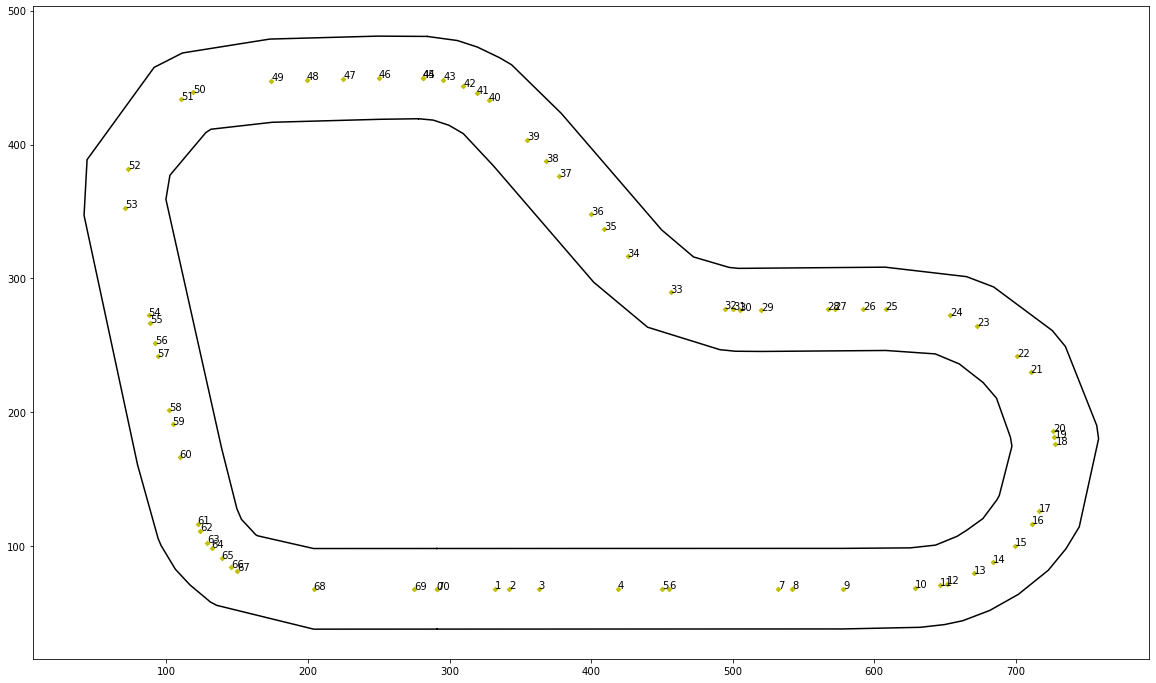

In [11]:
plot_track_and_waypoints(waypoints, True, figsize=(20,12))

# Visualización de Dataframe

In [11]:
trace_df[trace_df.episode == 0]

,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp,iteration
0,0,0,305.00,68.32,0.0004,0.00,0.00,0,0.0000,False,True,0.7922,0,17.67,1.570718e+09,1
1,0,1,305.00,68.32,0.0004,-0.52,2.67,0,0.3333,False,True,0.7922,0,17.67,1.570718e+09,1
2,0,0,305.00,68.32,0.0003,0.00,0.00,0,0.0000,False,True,0.7922,0,17.67,1.570718e+09,1
3,0,1,305.02,68.32,0.0002,0.00,8.00,8,1.0000,False,True,0.7932,0,17.67,1.570718e+09,1
4,0,2,305.50,68.28,-0.0009,-0.52,5.33,1,0.6667,False,True,0.8205,0,17.67,1.570718e+09,1
5,0,3,306.56,68.29,-0.0005,0.26,5.33,10,0.6667,False,True,0.8806,0,17.67,1.570718e+09,1
6,0,4,308.23,68.27,-0.0015,0.26,2.67,9,0.3333,False,True,0.9749,0,17.67,1.570718e+09,1
7,0,5,310.94,68.53,0.0157,0.52,8.00,14,1.0000,False,True,1.1284,0,17.67,1.570718e+09,1
8,0,6,314.60,68.88,0.0347,0.00,8.00,8,1.0000,False,True,1.3357,1,17.67,1.570718e+09,1
9,0,7,318.88,69.23,0.0453,0.26,2.67,9,0.3333,False,True,1.5776,1,17.67,1.570718e+09,1


In [12]:
len(trace_df)

114910

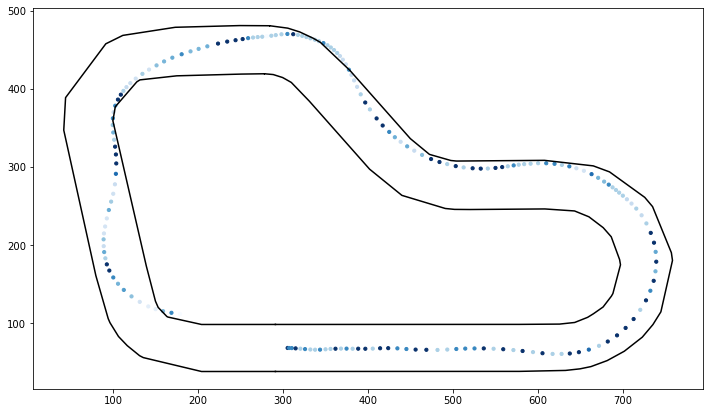

In [13]:
plt.figure(figsize=(12,7))
episode = trace_df[trace_df['episode'] == 800]
#plt.scatter(episode['x'].iloc[0], episode['y'].iloc[0], marker='X', s=200, c=f'C{i}')
plt.scatter(episode['x'], 
            episode['y'], s=10, c=episode['reward'], cmap='Blues')
# for x, y, r in episode[['x', 'y', 'reward']].values[::3]:
#     plt.text(x, y, str(r), size=8)
#plt.text()
plot_track_and_waypoints(waypoints=waypoints, draw_wp=False, figsize=None)
plt.show()

# Primera iteración con sus 20 episodios de entrenamiento

In [14]:
import matplotlib as mpl
mpl.style.use('default')

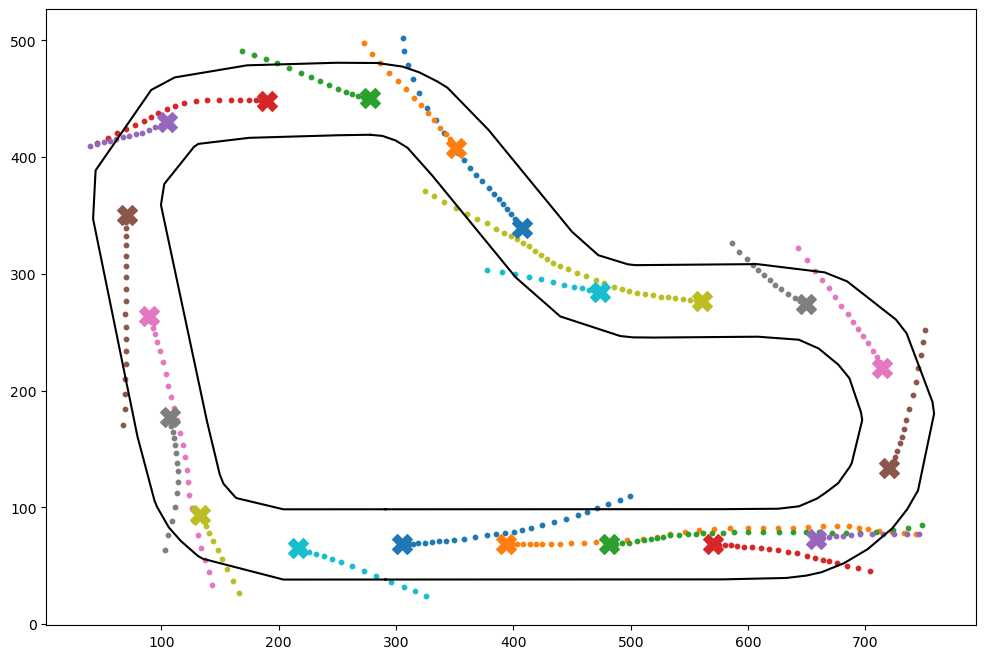

In [15]:
plt.figure(figsize=(12,8))
iter_1_episodes = trace_df[trace_df['iteration'] == 1]
for i in range(20):
    episode = iter_1_episodes[iter_1_episodes['episode'] == i]
    plt.scatter(episode['x'].iloc[0], episode['y'].iloc[0], marker='X', s=200, c=f'C{i}')
    plt.scatter(episode['x'], 
                episode['y'], s=10, c=f'C{i}')
plot_track_and_waypoints(waypoints=waypoints, draw_wp=False, figsize=None)
plt.show()

In [16]:
# Setear cantidad de horas de entrenamiento
training_hours = 1
episode_after_some_time = min(trace_df[((trace_df['timestamp'] - trace_df['timestamp'].iloc[0])/3600)>training_hours]['episode'])
iter_after_some_time = min(trace_df[((trace_df['timestamp'] - trace_df['timestamp'].iloc[0])/3600)>training_hours]['iteration'])
md(f"# Luego de {training_hours} horas de entrenamiento en la iteración {iter_after_some_time} empezando por episodio {episode_after_some_time}")

# Luego de 1 horas de entrenamiento en la iteración 31 empezando por episodio 600

600


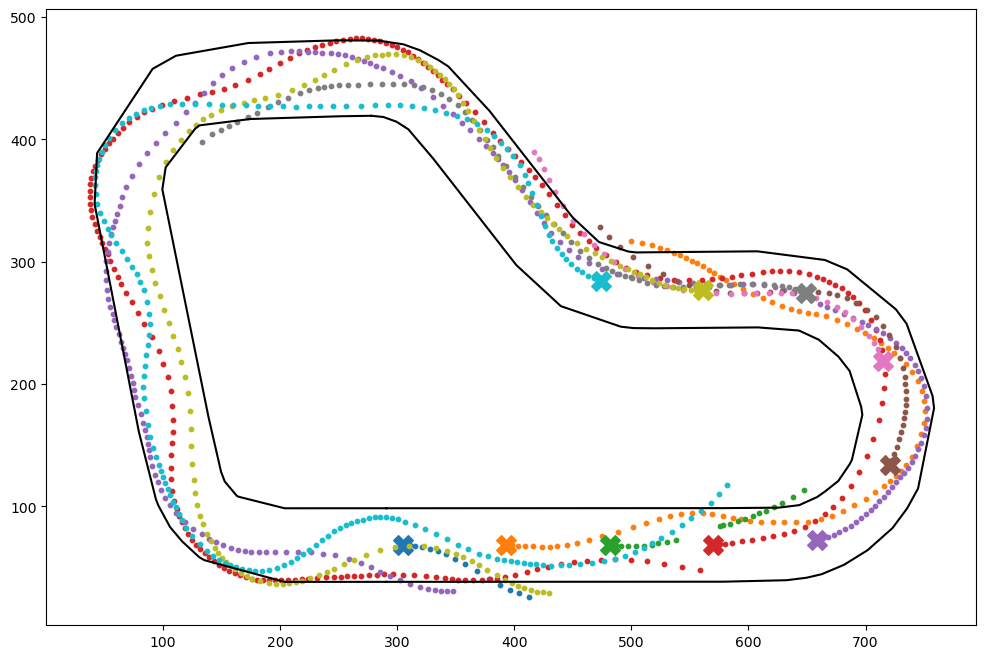

In [17]:
plt.figure(figsize=(12,8))
N_graph = 10
iter_n_episodes = trace_df[trace_df['iteration'] == iter_after_some_time]
print(episode_after_some_time)
for i in range(N_graph):
    episode = iter_n_episodes[iter_n_episodes['episode'] == episode_after_some_time + i]
    plt.scatter(episode['x'].iloc[0], episode['y'].iloc[0], 
                marker='X', s=200, c=f'C{i}')
    plt.scatter(episode['x'], 
                episode['y'], s=10, c=f'C{i}')
plot_track_and_waypoints(waypoints=waypoints, draw_wp=False, figsize=None)
plt.show()

# Episodios donde la pista se completa

## Graficamos 10 de estos

In [18]:
N_graph = 10

In [19]:
finished_episodes = trace_df[(trace_df['progress'] == 100)]['episode'].values

In [20]:
episode = trace_df[trace_df['episode'] == finished_episodes[0]] 
meters_drove = ((episode['x'].diff(1).values[1:]**2 + episode['y'].diff(1).values[1:]**2)**(0.5)).sum()

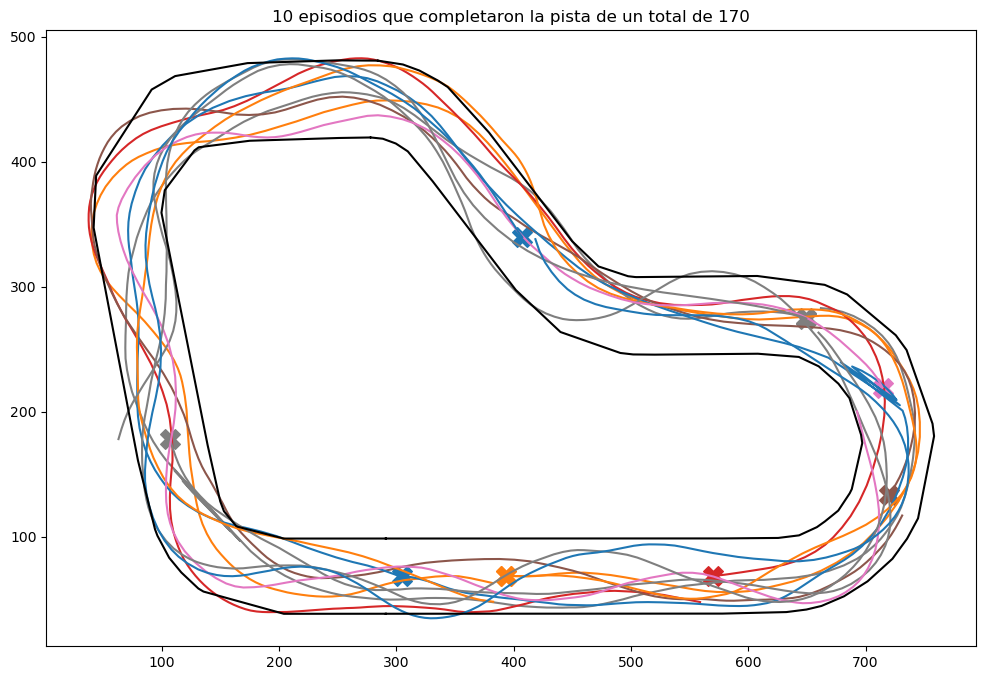

In [21]:
episode = 500
plt.figure(figsize=(12,8))

for i in finished_episodes[:N_graph]:
    episode = trace_df[trace_df['episode'] == i]
    plt.scatter(episode['x'].iloc[0], episode['y'].iloc[0], 
                marker='X', s=200, c=f'C{i}')
    plt.plot(episode['x'], 
                episode['y'], c=f'C{i}')
plot_track_and_waypoints(waypoints=waypoints, draw_wp=False, figsize=None)
plt.title(f'{N_graph} episodios que completaron la pista de un total de {len(finished_episodes)}')
plt.show()

# Calculo de valores promedios de episodios que terminaron la pista

In [22]:
track_time = []
speeds = []
steps = []
acc_reward = []
meters_drove = []
for i in finished_episodes:
    episode = trace_df[trace_df['episode'] == i]
    track_time.append(episode.iloc[-1]['timestamp'] - episode.iloc[0]['timestamp'])
    speeds.append(episode['throttle'].mean())
    steps.append(episode['steps'].iloc[-1])
    meters_drove.append(((episode['x'].diff(1).values[1:]**2 + episode['y'].diff(1).values[1:]**2)**(0.5)).sum())
    acc_reward.append(episode['reward'].sum())
    
track_time = np.array(track_time)
speeds = np.array(speeds)
steps = np.array(steps)
acc_reward = np.array(acc_reward)
meters_drove = np.array(meters_drove)

print('Average episode Returns:')
print(acc_reward.mean(), acc_reward.std())
print()
print('Average episode Speed:')
print(speeds.mean(), speeds.std())
print()
print('Average episode Steps:')
print(steps.mean(), steps.std())
print()
print('Average meters Drove:')
print(meters_drove.mean()/100, meters_drove.std()/100)
print()
print('Average Track time:')
print(track_time.mean(), track_time.std())
print()

Average episode Returns:
102.47901588235293 5.917749216088196

Average episode Speed:
4.479697642341657 0.25447384119127775

Average episode Steps:
220.16470588235293 18.097349210392846

Average meters Drove:
18.182800864033833 0.8824564797462869

Average Track time:
14.696428099800558 1.2080080107555007



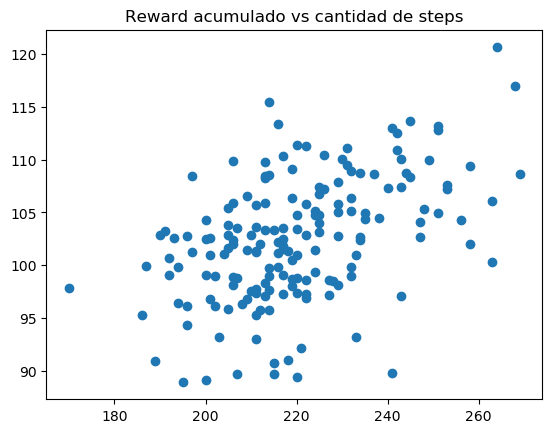

In [23]:
plt.scatter(steps, acc_reward)
plt.title('Reward acumulado vs cantidad de steps')
plt.show()

In [24]:
np.corrcoef(steps, acc_reward)

array([[1.        , 0.47397752],
       [0.47397752, 1.        ]])

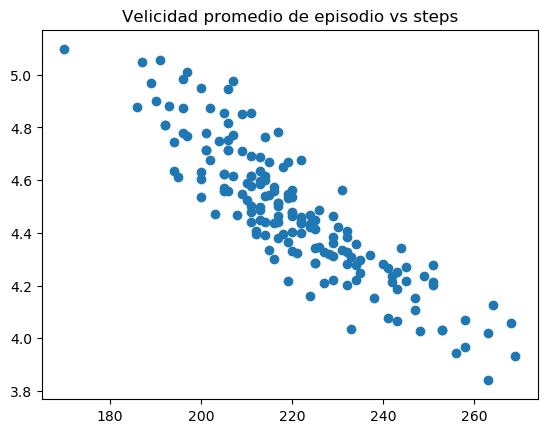

In [25]:
plt.scatter(steps, speeds)
plt.title('Velicidad promedio de episodio vs steps')
plt.show()

In [26]:
np.corrcoef(steps, speeds)

array([[ 1.        , -0.88591234],
       [-0.88591234,  1.        ]])

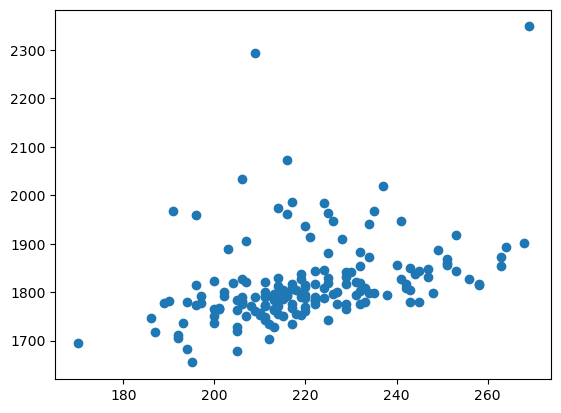

array([[1.        , 0.37126646],
       [0.37126646, 1.        ]])

In [27]:
plt.scatter(steps, meters_drove)
plt.show()
np.corrcoef(steps, meters_drove)

# Últimos 10 episodios

In [28]:
n_episodes = max(trace_df['episode'])

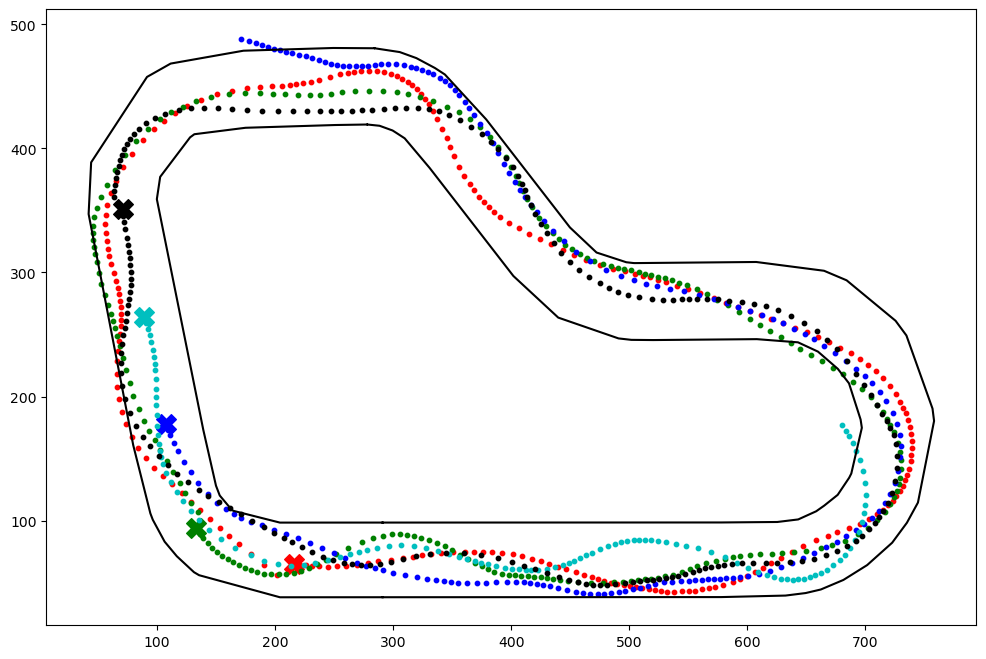

In [29]:
plt.figure(figsize=(12,8))
for i in range(5):
    episode = trace_df[trace_df['episode'] == n_episodes-i]
    colors = ['r', 'g', 'b', 'c', 'k']
    plt.scatter(episode['x'].iloc[0], episode['y'].iloc[0], marker='X', s=200, c=colors[i%len(colors)])
    plt.scatter(episode['x'], 
                episode['y'], s=10, c=colors[i%len(colors)])
plot_track_and_waypoints(waypoints=waypoints, draw_wp=False, figsize=None)
plt.show()

# Distribución de los rewards

In [30]:
center_line = waypoints[:,0:2] *100
inner_border = waypoints[:,2:4] *100
outer_border = waypoints[:,4:6] *100

In [31]:
# add y_offset to bring everything to the positive axis

y_offset = int(trace_df['y'].min())
if y_offset > 0: # if positive, just keep it the same
    y_offset = 0
y_offset = abs(y_offset)

inner_border[:,1] = inner_border[:,1] + y_offset
center_line[:,1] = center_line[:,1] + y_offset
outer_border[:,1] = outer_border[:,1] + y_offset

In [32]:
def plot_track(df, track_size=(500, 800), x_offset=0, y_offset=0):
    '''
    Each track may have a diff track size, 
    For reinvent track, use track_size=(500, 800)
    Tokyo, track_size=(700, 1000)
    x_offset, y_offset is used to convert to the 0,0 coordinate system
    '''
    track = np.zeros(track_size) # lets magnify the track by *100
    for index, row in df.iterrows():
        x = int(row["x"]) + x_offset
        y = int(row["y"]) + y_offset
        reward = row["reward"]
        
        track[y,x] = reward 
        
    fig = plt.figure(1, figsize=(10, 16))
    ax = fig.add_subplot(111)
    return track

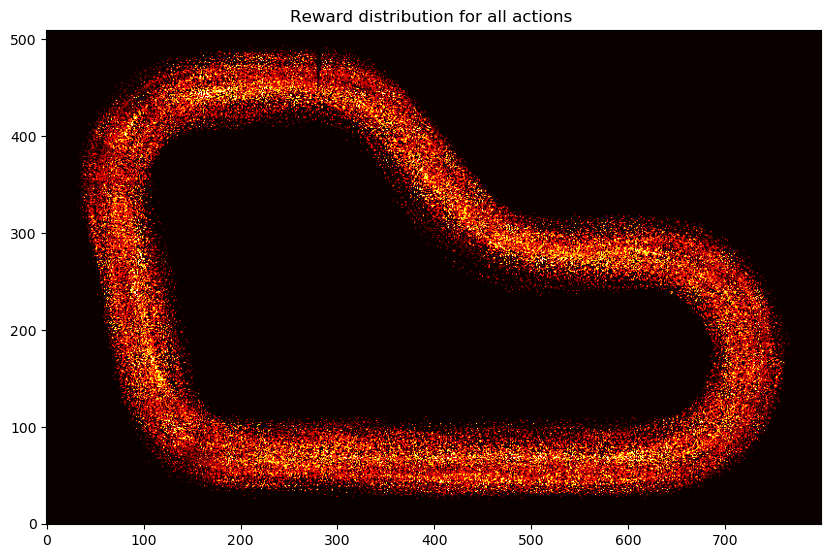

In [33]:
track = plot_track(trace_df, (510, 800))
plt.title("Reward distribution for all actions ")
im = plt.imshow(track, cmap='hot', interpolation='bilinear', origin="lower") 

# Distribución de los rewards de episodios terminados

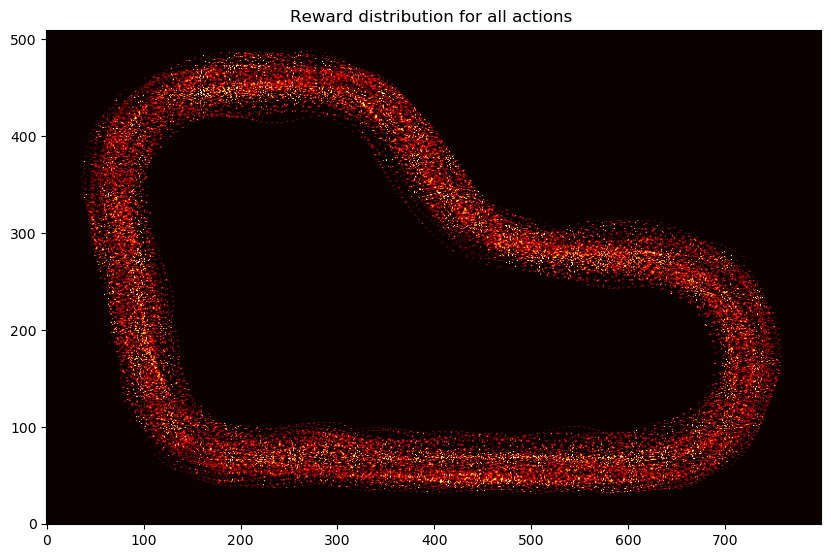

In [34]:
track = plot_track(trace_df[trace_df['episode'].isin(finished_episodes)], (510, 800))
plt.title("Reward distribution for all actions ")
im = plt.imshow(track, cmap='hot', interpolation='bilinear', origin="lower") 

# Un solo episodio

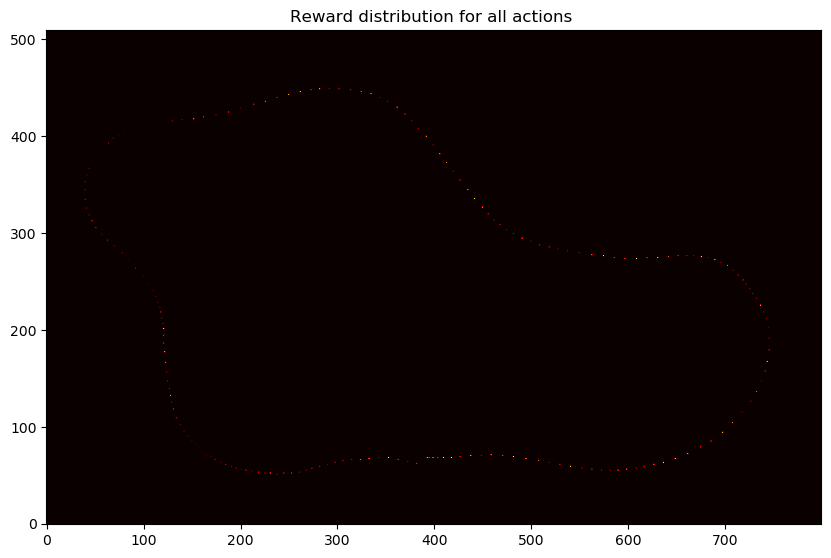

In [35]:
track = plot_track(trace_df[trace_df['episode']==finished_episodes[0]], (510, 800))
plt.title("Reward distribution for all actions ")
im = plt.imshow(track, cmap='hot', interpolation='bilinear', origin="lower") 

# Analisis de acciones

### Colocar la data de training job

Es lo mismo que para simulation pero es el **View logs** del **training job**

In [36]:
logGroupName='/aws/sagemaker/TrainingJobs'
# logStreamName='dr-sm-rltj--20191002101606-325b7ca3-edd8-4654-b15d-97d47a2b8a21/algo-1-1570011477'
# No-progress-reward
logStreamName='dr-sm-rltj--20191010142353-88a5da2b-9f85-40ef-8947-3348b158ba79/algo-1-1570717564'
file_name = logStreamName.split('/')[0]

In [37]:
filename_full_path = f'TrainingLogs/{file_name}.json'
if os.path.isfile(filename_full_path):
    logs = json.load(open(filename_full_path))
else:
    logs = client.filter_log_events(logGroupName=logGroupName, 
                             logStreamNames=[logStreamName], 
                             limit=10000)
    file = open(filename_full_path, 'w')
    json.dump(logs, file)
    file.close()

In [51]:
df_sims = pd.DataFrame(logs['events'])[['message', 'timestamp']]

In [53]:
# Buscamos el accion space
str_to_find = 'Loaded action space from file: '
found_str = df_sims[df_sims['message'].apply(lambda x: str_to_find in x)]['message'].values[0].replace("'", "\"").replace(str_to_find, '')
action_space = json.loads(found_str)

action_names = []
for d in action_space:
    angle = d['steering_angle']
    speed = d['speed']
    action_names.append(f'Angle:{angle}|Speed:{speed:.2f}')
print(action_names)

['Angle:-30|Speed:2.67', 'Angle:-30|Speed:5.33', 'Angle:-30|Speed:8.00', 'Angle:-15|Speed:2.67', 'Angle:-15|Speed:5.33', 'Angle:-15|Speed:8.00', 'Angle:0|Speed:2.67', 'Angle:0|Speed:5.33', 'Angle:0|Speed:8.00', 'Angle:15|Speed:2.67', 'Angle:15|Speed:5.33', 'Angle:15|Speed:8.00', 'Angle:30|Speed:2.67', 'Angle:30|Speed:5.33', 'Angle:30|Speed:8.00']


In [40]:
from log_analysis import make_error_boxes, print_border

In [41]:
# Una iteración con alto reward
iteration_id = trace_df[trace_df['episode'] == finished_episodes[acc_reward.argmax()]]['iteration'].iloc[0]

In [42]:
# Track Segment Labels
# action_names = ['LEFT', 'RIGHT', 'STRAIGHT', 'SLIGHT LEFT', 'SLIGHT RIGHT', 'SLOW']


Number of steps in iteration= 3536


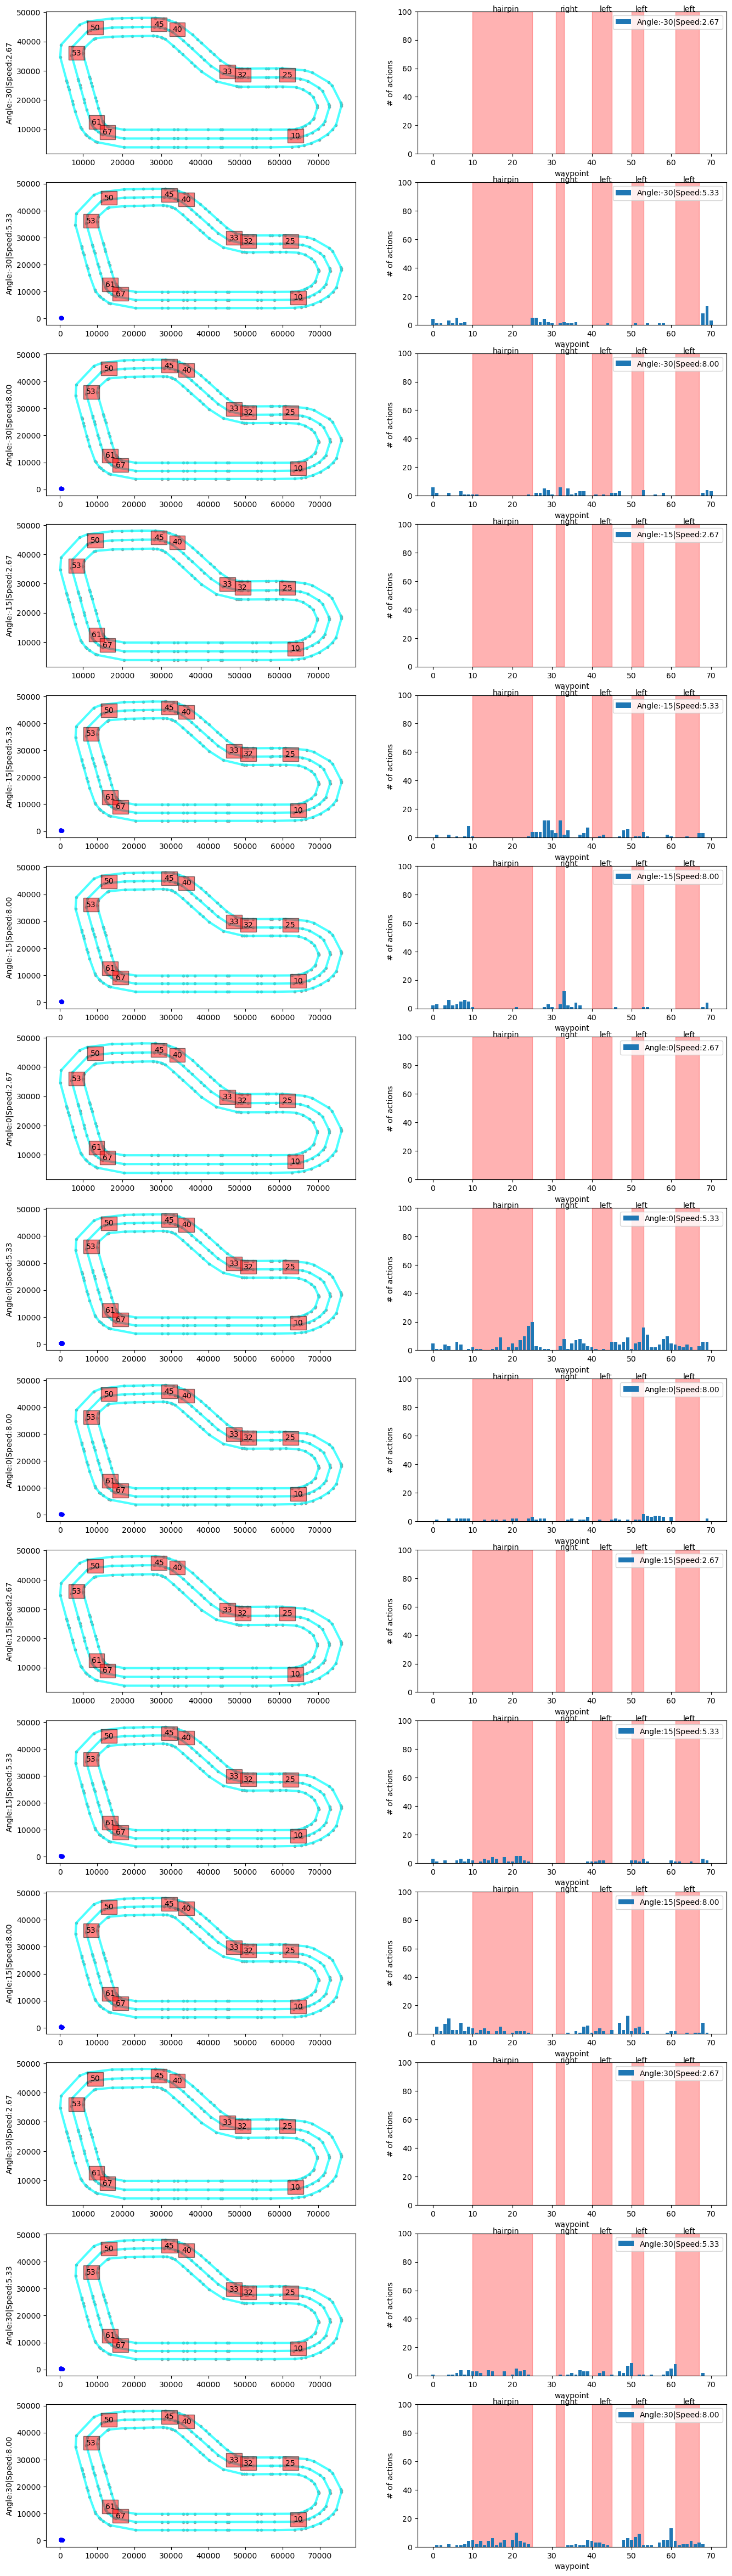

In [43]:
fig = plt.figure(figsize=(16, 60))
iterations_downselect = [iteration_id] ## Lets pick the iteratons with the highest rewards


vert_lines = [10,25,32,33,40,45,50,53,61,67]
track_segments = [(15, 100, 'hairpin'),
                  (32, 100, 'right'),
                  (42, 100, 'left'),
                  (51, 100, 'left'),
                  (63, 100, 'left')]

segment_x = np.array([15, 32, 42, 51, 63])
segment_y = np.array([0, 0, 0, 0, 0])

segment_xerr = np.array([[5, 1, 2, 1, 2], [10, 1, 3, 2, 4]])
box_height = 100
segment_yerr = np.array([[0, 0, 0, 0, 0], [box_height, box_height, box_height, box_height, box_height]])

wpts_array = center_line 

for iter_num in iterations_downselect:

    # Slice the data frame to get all episodes in that iteration
    df_iter = trace_df[(iter_num == trace_df['iteration'])]
    n_steps_in_iter = len(df_iter)
    print('Number of steps in iteration=', n_steps_in_iter)

    th = 0.5
    for idx in range(len(action_names)):
        ax = fig.add_subplot(len(action_names), 2, 2*idx+1)
        print_border(ax, center_line, inner_border, outer_border) 
            
        df_slice = df_iter[df_iter['reward'] >= th]
        df_slice = df_slice[df_slice['action'] == idx]

        ax.plot(df_slice['x'], df_slice['y'], 'b.')

        for idWp in vert_lines:
            ax.text(wpts_array[idWp][0], wpts_array[idWp][1]+20, str(idWp), bbox=dict(facecolor='red', alpha=0.5))

        #ax.set_title(str(log_name_id) + '-' + str(iter_num) + ' w rew >= '+str(th))
        ax.set_ylabel(action_names[idx])

        # calculate action way point distribution
        action_waypoint_distribution = list()
        for idWp in range(len(wpts_array)):
            action_waypoint_distribution.append(len(df_slice[df_slice['closest_waypoint'] == idWp]))

        ax = fig.add_subplot(len(action_names), 2, 2 * idx + 2)

        # Call function to create error boxes
        _ = make_error_boxes(ax, segment_x, segment_y, segment_xerr, segment_yerr)

        for tt in range(len(track_segments)):
            ax.text(track_segments[tt][0], track_segments[tt][1], track_segments[tt][2])

        ax.bar(np.arange(len(wpts_array)), action_waypoint_distribution)
        ax.set_xlabel('waypoint')
        ax.set_ylabel('# of actions')
        ax.legend([action_names[idx]])
        ax.set_ylim((0, box_height))

# Red neuronal - Analisis

In [60]:
# Carga de imágenes
import glob
img_path = "simulation_episode/"
all_files = sorted(glob.glob(img_path + '/*.png'))
print('Cantidad de imágenes:',len(all_files))

Cantidad de imágenes: 917


In [92]:
str_to_find = 's3_bucket'
splitted_array = df_sims[df_sims['message'].apply(lambda x: str_to_find in x)]['message'].values[0].replace('"', '').replace('--', '').split(',')
for i,tx in enumerate(splitted_array):
    if str_to_find in tx:
        break
s3_bucket = splitted_array[i+1]

In [93]:
str_to_find = 's3_prefix'
splitted_array = df_sims[df_sims['message'].apply(lambda x: str_to_find in x)]['message'].values[0].replace('"', '').replace('--', '').split(',')
for i,tx in enumerate(splitted_array):
    if str_to_find in tx:
        break
s3_prefix = splitted_array[i+1]

In [94]:
# Guarda en la carpeta intermediate_checkpoint/ los modelos intermedios que empiezan con 3
# Modificar para traer sus propios modelos
!aws s3 sync s3://$s3_bucket/$s3_prefix/model/ intermediate_checkpoint/ --exclude "*" --include "*model_3*"

download: s3://aws-deepracer-ff0cc1db-3f91-4d02-9c3f-3ceaef9a7f07/DeepRacer-SageMaker-RoboMaker-comm-940645781828-20191010142353-f654b91c-2779-43ad-98a2-8292f6f6060c/model/model_3.pb to intermediate_checkpoint/model_3.pb
download: s3://aws-deepracer-ff0cc1db-3f91-4d02-9c3f-3ceaef9a7f07/DeepRacer-SageMaker-RoboMaker-comm-940645781828-20191010142353-f654b91c-2779-43ad-98a2-8292f6f6060c/model/model_31.pb to intermediate_checkpoint/model_31.pb
download: s3://aws-deepracer-ff0cc1db-3f91-4d02-9c3f-3ceaef9a7f07/DeepRacer-SageMaker-RoboMaker-comm-940645781828-20191010142353-f654b91c-2779-43ad-98a2-8292f6f6060c/model/model_33.pb to intermediate_checkpoint/model_33.pb
download: s3://aws-deepracer-ff0cc1db-3f91-4d02-9c3f-3ceaef9a7f07/DeepRacer-SageMaker-RoboMaker-comm-940645781828-20191010142353-f654b91c-2779-43ad-98a2-8292f6f6060c/model/model_30.pb to intermediate_checkpoint/model_30.pb
download: s3://aws-deepracer-ff0cc1db-3f91-4d02-9c3f-3ceaef9a7f07/DeepRacer-SageMaker-RoboMaker-comm-940645781

In [95]:
GRAPH_PB_PATH = 'intermediate_checkpoint/'
!ls $GRAPH_PB_PATH

model_30.pb  model_32.pb  model_34.pb  model_36.pb  model_38.pb  model_3.pb
model_31.pb  model_33.pb  model_35.pb  model_37.pb  model_39.pb
